In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [5]:
data = pd.read_csv("daily_counts.csv")

In [6]:
data.head()

,OCC_DATE,Count
0,2014-01-01,58
1,2014-01-02,141
2,2014-01-03,222
3,2014-01-04,139
4,2014-01-05,94


In [7]:
data['OCC_DATE']=pd.to_datetime(data['OCC_DATE'], infer_datetime_format=True)
data=data.set_index(['OCC_DATE'])
print(data.head())
print(data.tail())

            Count
OCC_DATE         
2014-01-01     58
2014-01-02    141
2014-01-03    222
2014-01-04    139
2014-01-05     94
            Count
OCC_DATE         
2024-03-27    117
2024-03-28    130
2024-03-29     54
2024-03-30     94
2024-03-31     74


C:\Users\Administrator.PC-20160612FDJX\AppData\Local\Temp\ipykernel_15520\582044060.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  data['OCC_DATE']=pd.to_datetime(data['OCC_DATE'], infer_datetime_format=True)


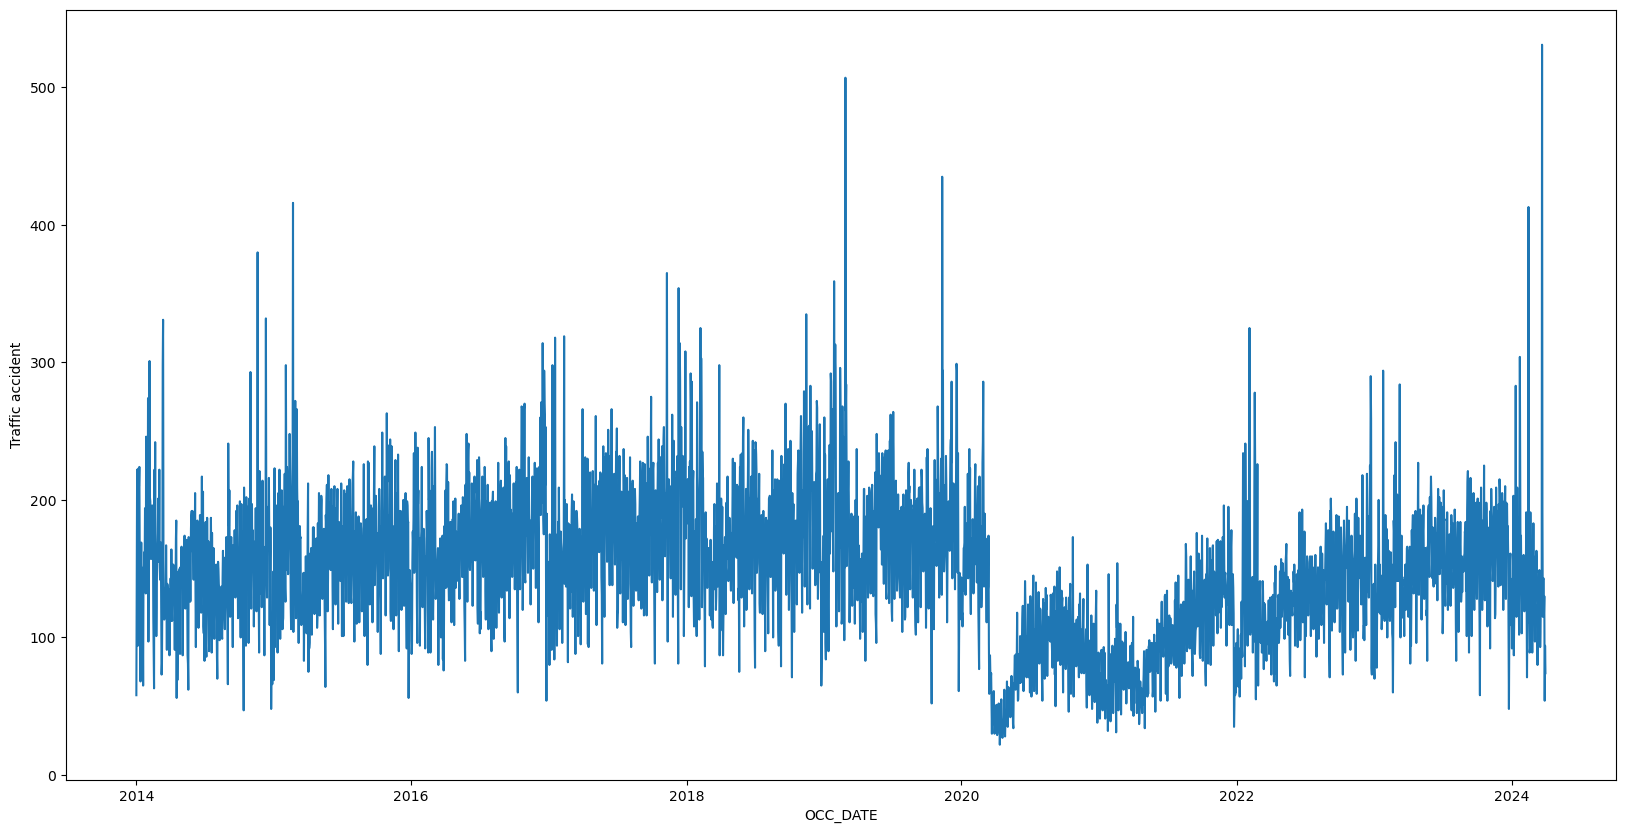

In [8]:
plt.figure(figsize=(20,10))
plt.xlabel("OCC_DATE")
plt.ylabel("Traffic accident")
plt.plot(data)

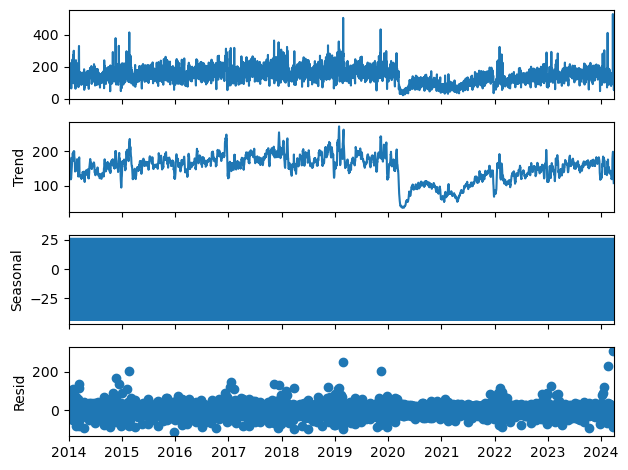

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose
series = data
result = seasonal_decompose(series, model='additive')
result.plot()
plt.show()

In [10]:
from statsmodels.tsa.api import SimpleExpSmoothing

model = SimpleExpSmoothing(data)
model_fit = model.fit(smoothing_level=0.2)

forecast = model_fit.forecast(6)
print(forecast)

2024-04-01    115.488471
2024-04-02    115.488471
2024-04-03    115.488471
2024-04-04    115.488471
2024-04-05    115.488471
2024-04-06    115.488471
Freq: D, dtype: float64


C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


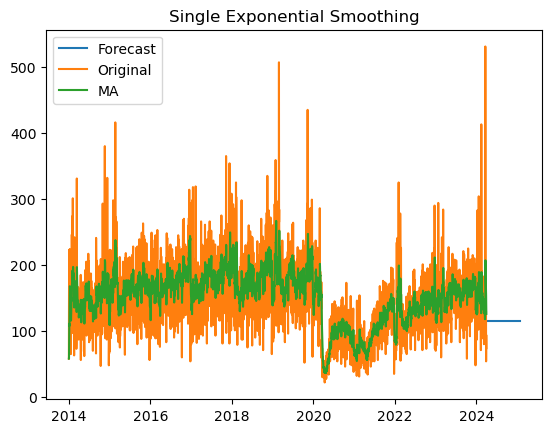

In [15]:
data['ES1'] = SimpleExpSmoothing(data['Count']).fit(smoothing_level=0.2,optimized=False,use_brute=True).fittedvalues

plt.plot(model_fit.forecast(300))
plt.plot(data[['Count','ES1']])
plt.title('Single Exponential Smoothing')
plt.legend(["Forecast", "Original", "MA"])
plt.show()


In [16]:
from statsmodels.tsa.holtwinters import Holt
model2 = Holt(data['Count'])
model_fit2 = model2.fit(smoothing_level=0.8, smoothing_trend=0.2)
#I just left the default alpha values, 0.2 and 0.8 here - it is a hyper parameter that should be tuned
forecast2 = model_fit2.forecast(6)
print(forecast2)

2024-04-01    63.476981
2024-04-02    52.855372
2024-04-03    42.233764
2024-04-04    31.612155
2024-04-05    20.990546
2024-04-06    10.368938
Freq: D, dtype: float64


C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


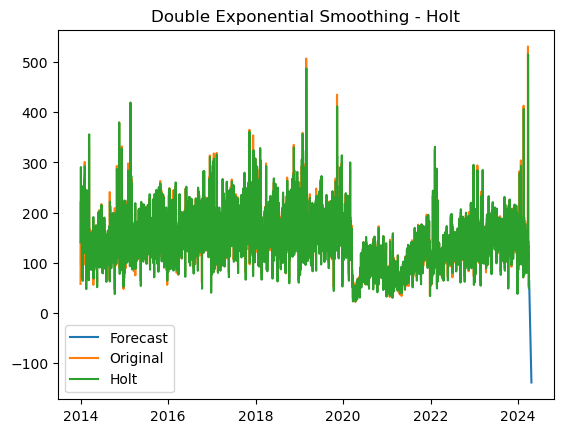

In [24]:
data['ES2'] = Holt(data['Count']).fit(smoothing_level=0.8, smoothing_trend=0.2,optimized=False,use_brute=True).fittedvalues

plt.plot(model_fit2.forecast(20))
plt.plot(data[['Count','ES2']])
plt.title('Double Exponential Smoothing - Holt')
plt.legend(["Forecast", "Original", "Holt"])
plt.show()

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model3 = ExponentialSmoothing(data['Count'])
model_fit3 = model2.fit()

forecast3 = model_fit3.forecast(6)
print(forecast3)

2024-04-01    87.895626
2024-04-02    83.103550
2024-04-03    78.311474
2024-04-04    73.519398
2024-04-05    68.727322
2024-04-06    63.935246
Freq: D, dtype: float64


C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


C:\Users\Administrator.PC-20160612FDJX\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


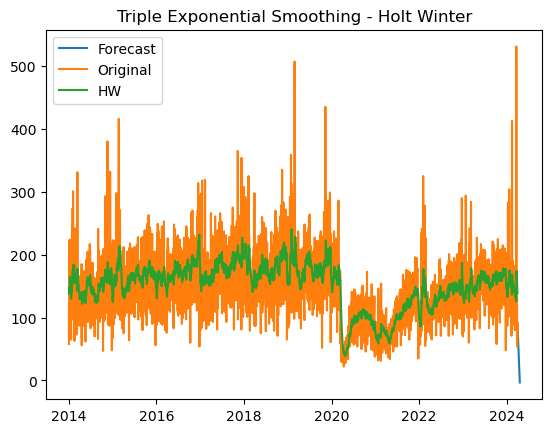

In [27]:
data['ES3'] = ExponentialSmoothing(data['Count']).fit().fittedvalues

plt.plot(model_fit3.forecast(20))
plt.plot(data[['Count','ES3']])
plt.title('Triple Exponential Smoothing - Holt Winter')
plt.legend(["Forecast", "Original", "HW"])
plt.show()
